Table Of Contents.  
1. Import libraries and cleaned dataset.
2. Select variables for exploratory visual analysis.
3. Create a correlation matrix heatmap using seaborn.
4. Create scatterplots for the variables with the strongest correlations.
5. Create a pair plot to visualize relationships between all numeric variables.
6. Create a categorical plot: Estimated Deliveries by Region.
7. Hypotheses for further analysis.  

1. Import libraries and cleaned dataset

In [19]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams["font.family"] = "DejaVu Sans" # Set global font to DejaVu Sans to support special characters (e.g., CO₂) and avoid font warnings
import seaborn as sns

In [3]:
# Load the cleaned dataset
df = pd.read_excel("Tesla_Global_Deliveries_Cleaned.xlsx")

In [4]:
# Display the first few rows to confirm it loaded correctly
df.head()

,Year,Month,Region,Model,Estimated_Deliveries,Production_Units,Avg_Price_USD,Battery_Capacity_kWh,Range_km,CO2_Saved_tons,Source_Type,Charging_Stations
0,2015,4,Europe,Model X,8458,9039,88193.18,120,716,908.39,Interpolated (Month),7633
1,2015,3,Europe,Model X,3940,4493,98722.09,75,433,255.90,Interpolated (Month),4166
2,2015,6,Europe,Model 3,8922,9609,104855.71,75,427,571.45,Official (Quarter),10465
3,2015,2,Asia,Model S,12347,12514,108471.17,82,464,859.35,Interpolated (Month),5238
4,2015,12,Middle East,Model Y,7294,7513,84411.62,82,453,495.63,Interpolated (Month),9983


2. Select variables for exploratory visual analysis

Based on the research questions defined earlier, I selected a subset of variables from the Tesla Global Deliveries (2015–2025) dataset that are most suitable for exploratory visualization.

The goal is to identify patterns, correlations, and differences between production, deliveries, pricing, and sustainability indicators across time, regions, and models.

**Performance and growth variables**

**Example questions:**
- How have Tesla’s global deliveries and production levels changed year by year?
- Which regions contribute the most to total deliveries?

**Selected variables:**  
`Year`, `Estimated_Deliveries`, `Production_Units`, `Region`

**Purpose:**  
To visualize Tesla’s overall growth and compare production/delivery trends over time and across regions.

**Technological and product variables**

**Example questions:**
- How do battery capacity and range differ across Tesla models and over time?
- Do improvements in battery capacity influence price or driving range?

**Selected variables:**  
`Model`, `Battery_Capacity_kWh`, `Range_km`, `Avg_Price_USD`, `Year`

**Purpose:**  
To analyze technological evolution and product efficiency across Tesla models.

**Geographical and infrastructure variables**

**Example questions:**
- How do Tesla’s production and delivery trends differ across regions?
- Is growth in charging infrastructure linked to higher deliveries?

**Selected variables:**  
`Region`, `Estimated_Deliveries`, `Production_Units`, `Charging_Stations`

**Purpose:**  
To evaluate Tesla’s geographic expansion and the relationship between infrastructure and market performance.

**Sustainability and environmental variables**

**Example questions:**
- How does CO₂ savings correlate with production growth?

**Selected variables:**  
`CO2_Saved_tons`, `Production_Units`, `Estimated_Deliveries`, `Year`

**Purpose:**  
To assess how Tesla’s environmental impact scales with business growth.

**Economic and market variables**

**Example questions:**
- What is the relationship between vehicle price and deliveries?

**Selected variables:**  
`Avg_Price_USD`, `Estimated_Deliveries`, `Region`, `Model`

**Purpose:**  
To explore how pricing affects demand and market share across Tesla’s global regions.

3. Create a correlation matrix heatmap using seaborn

In [5]:
# Select only the numeric columns
numeric_df = df.select_dtypes(include=['float64', 'int64'])

In [6]:
# Create a correlation matrix
corr_matrix = numeric_df.corr()

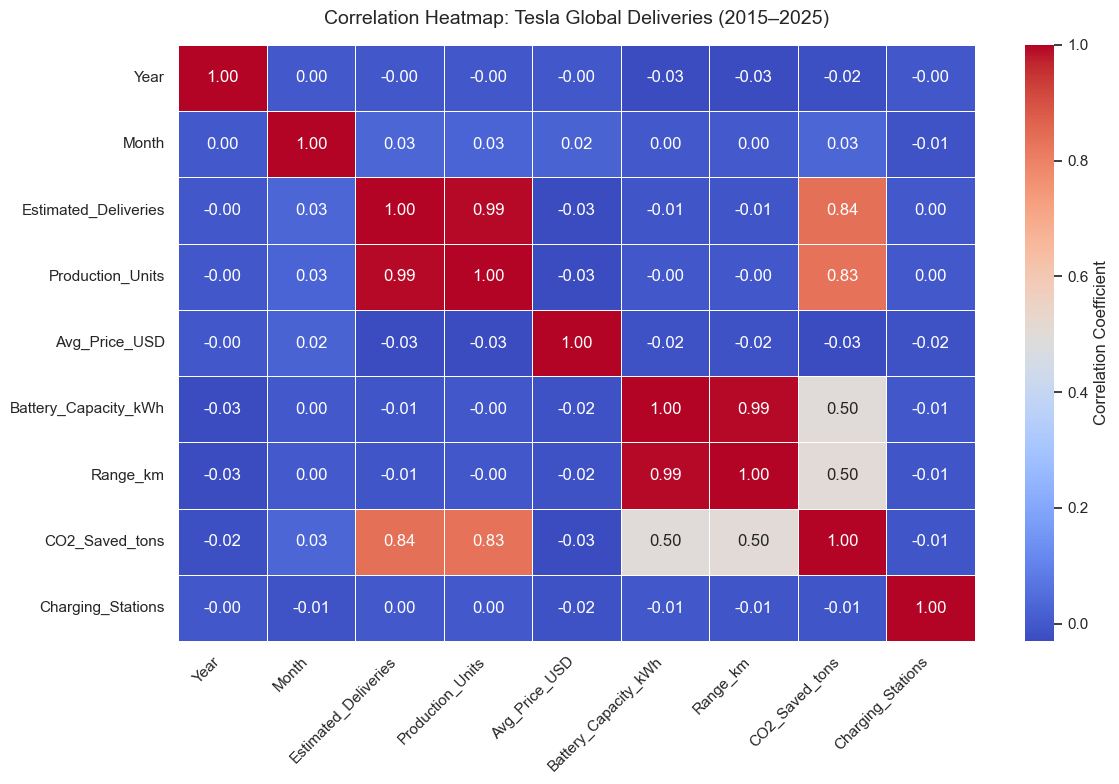

In [15]:
# Select only numeric columns
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Compute correlation matrix
corr_matrix = numeric_df.corr()

# Set up and plot
fig, ax = plt.subplots(figsize=(12, 8))
sns.heatmap(
    corr_matrix,
    cmap='coolwarm',
    annot=True,
    fmt=".2f",
    linewidths=0.5,
    cbar_kws={'label': 'Correlation Coefficient'},
    ax=ax
)

ax.set_title('Correlation Heatmap: Tesla Global Deliveries (2015–2025)', fontsize=14, pad=15)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
fig.savefig("tesla_correlation_heatmap.png", dpi=300, bbox_inches='tight')
plt.show()

Correlation Heatmap Analysis

The correlation heatmap above shows how Tesla’s key quantitative variables are related between 2015–2025. 

Key insights:

- **Production_Units** and **Estimated_Deliveries** are almost perfectly correlated (**0.99**), showing that as production increases, deliveries rise proportionally. This confirms the dataset’s internal consistency — production output directly drives deliveries.
  
- **CO2_Saved_tons** shows a **strong positive correlation** with both `Estimated_Deliveries (0.84)` and `Production_Units (0.83)`, meaning Tesla’s environmental impact grows alongside its operational scale.
  
- **Battery_Capacity_kWh** and **Range_km** are also **strongly correlated (0.99)**, which is expected since higher-capacity batteries generally yield longer driving ranges.

- There is a **moderate positive correlation (0.50)** between `Battery_Capacity_kWh` (and `Range_km`) and `CO2_Saved_tons`, suggesting that technological improvements (larger batteries and longer range) are associated with greater emissions savings.

- **Avg_Price_USD** shows almost **no correlation** with production or deliveries, which may indicate that Tesla’s expansion is not strongly tied to changes in average price — consistent with the introduction of mass-market vehicles like the Model 3 and Model Y.

- **Charging_Stations** shows negligible correlation with other variables, likely because charging infrastructure grows at a slower or more regionally uneven pace than vehicle sales.

Overall, the heatmap reveals logical relationships within the dataset:
Tesla’s production and delivery volumes are tightly linked to CO₂ savings, while technological variables such as battery capacity and range move together. 
Economic variables (like price) appear more independent, reflecting Tesla’s diversification of product lines. 
These relationships validate that the dataset behaves consistently with real-world trends in EV growth and sustainability.

4. Create scatterplots for the variables with the strongest correlations

In [13]:
# Set style
sns.set(style="whitegrid", palette="muted")

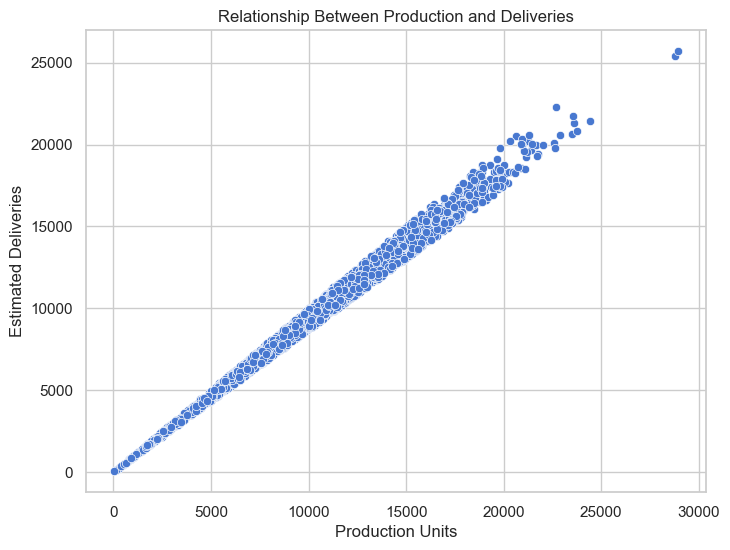

In [16]:
# 1. Production vs Deliveries
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x="Production_Units", y="Estimated_Deliveries")
plt.title("Relationship Between Production and Deliveries")
plt.xlabel("Production Units")
plt.ylabel("Estimated Deliveries")
plt.savefig("scatter_production_vs_deliveries.png", dpi=300, bbox_inches='tight')
plt.show()

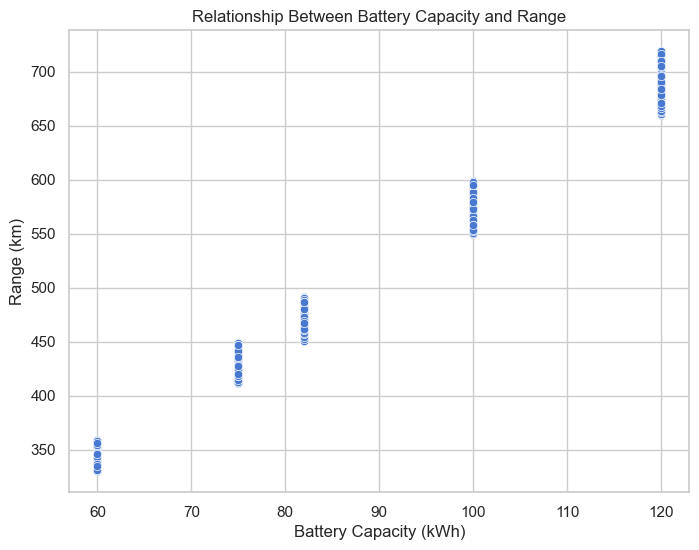

In [17]:
# 2. Battery Capacity vs Range
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x="Battery_Capacity_kWh", y="Range_km")
plt.title("Relationship Between Battery Capacity and Range")
plt.xlabel("Battery Capacity (kWh)")
plt.ylabel("Range (km)")
plt.savefig("scatter_battery_vs_range.png", dpi=300, bbox_inches='tight')
plt.show()

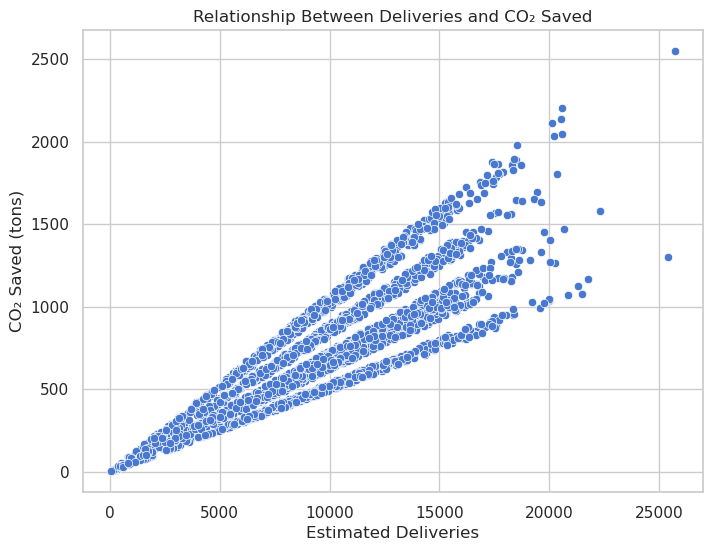

In [20]:
# 3. Deliveries vs CO₂ Saved
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x="Estimated_Deliveries", y="CO2_Saved_tons")
plt.title("Relationship Between Deliveries and CO₂ Saved")
plt.xlabel("Estimated Deliveries")
plt.ylabel("CO₂ Saved (tons)")
plt.savefig("scatter_deliveries_vs_co2_saved.png", dpi=300, bbox_inches='tight')
plt.show()

Scatterplot Analysis — Exploring Key Relationships

1. Production Units vs. Estimated Deliveries

This scatterplot shows a strong positive correlation between production and deliveries. As production increases, deliveries rise proportionally, suggesting that Tesla’s manufacturing capacity directly drives its global distribution. The tight clustering along a diagonal trend indicates high operational efficiency and alignment between production output and delivery performance.

2. Battery Capacity (kWh) vs. Range (km)

The relationship between battery capacity and driving range is also strongly positive, as expected. Higher-capacity batteries result in longer driving ranges, reflecting technological advancements and efficiency improvements in Tesla’s electric vehicles. The relatively tight clustering implies consistent performance scaling across models, though minor variance may reflect differences in model weight and design.

3. Estimated Deliveries vs. CO₂ Saved (tons)

This scatterplot reveals a clear positive correlation: higher deliveries are associated with greater CO₂ savings. As more Tesla vehicles are sold, the cumulative reduction in emissions increases correspondingly. This relationship supports the idea that Tesla’s market expansion directly contributes to environmental impact reduction. However, it’s important to remember that CO₂ savings are modeled estimates and may vary by driving conditions or regional energy sources.

5. Create a pair plot to visualize relationships between all numeric variables

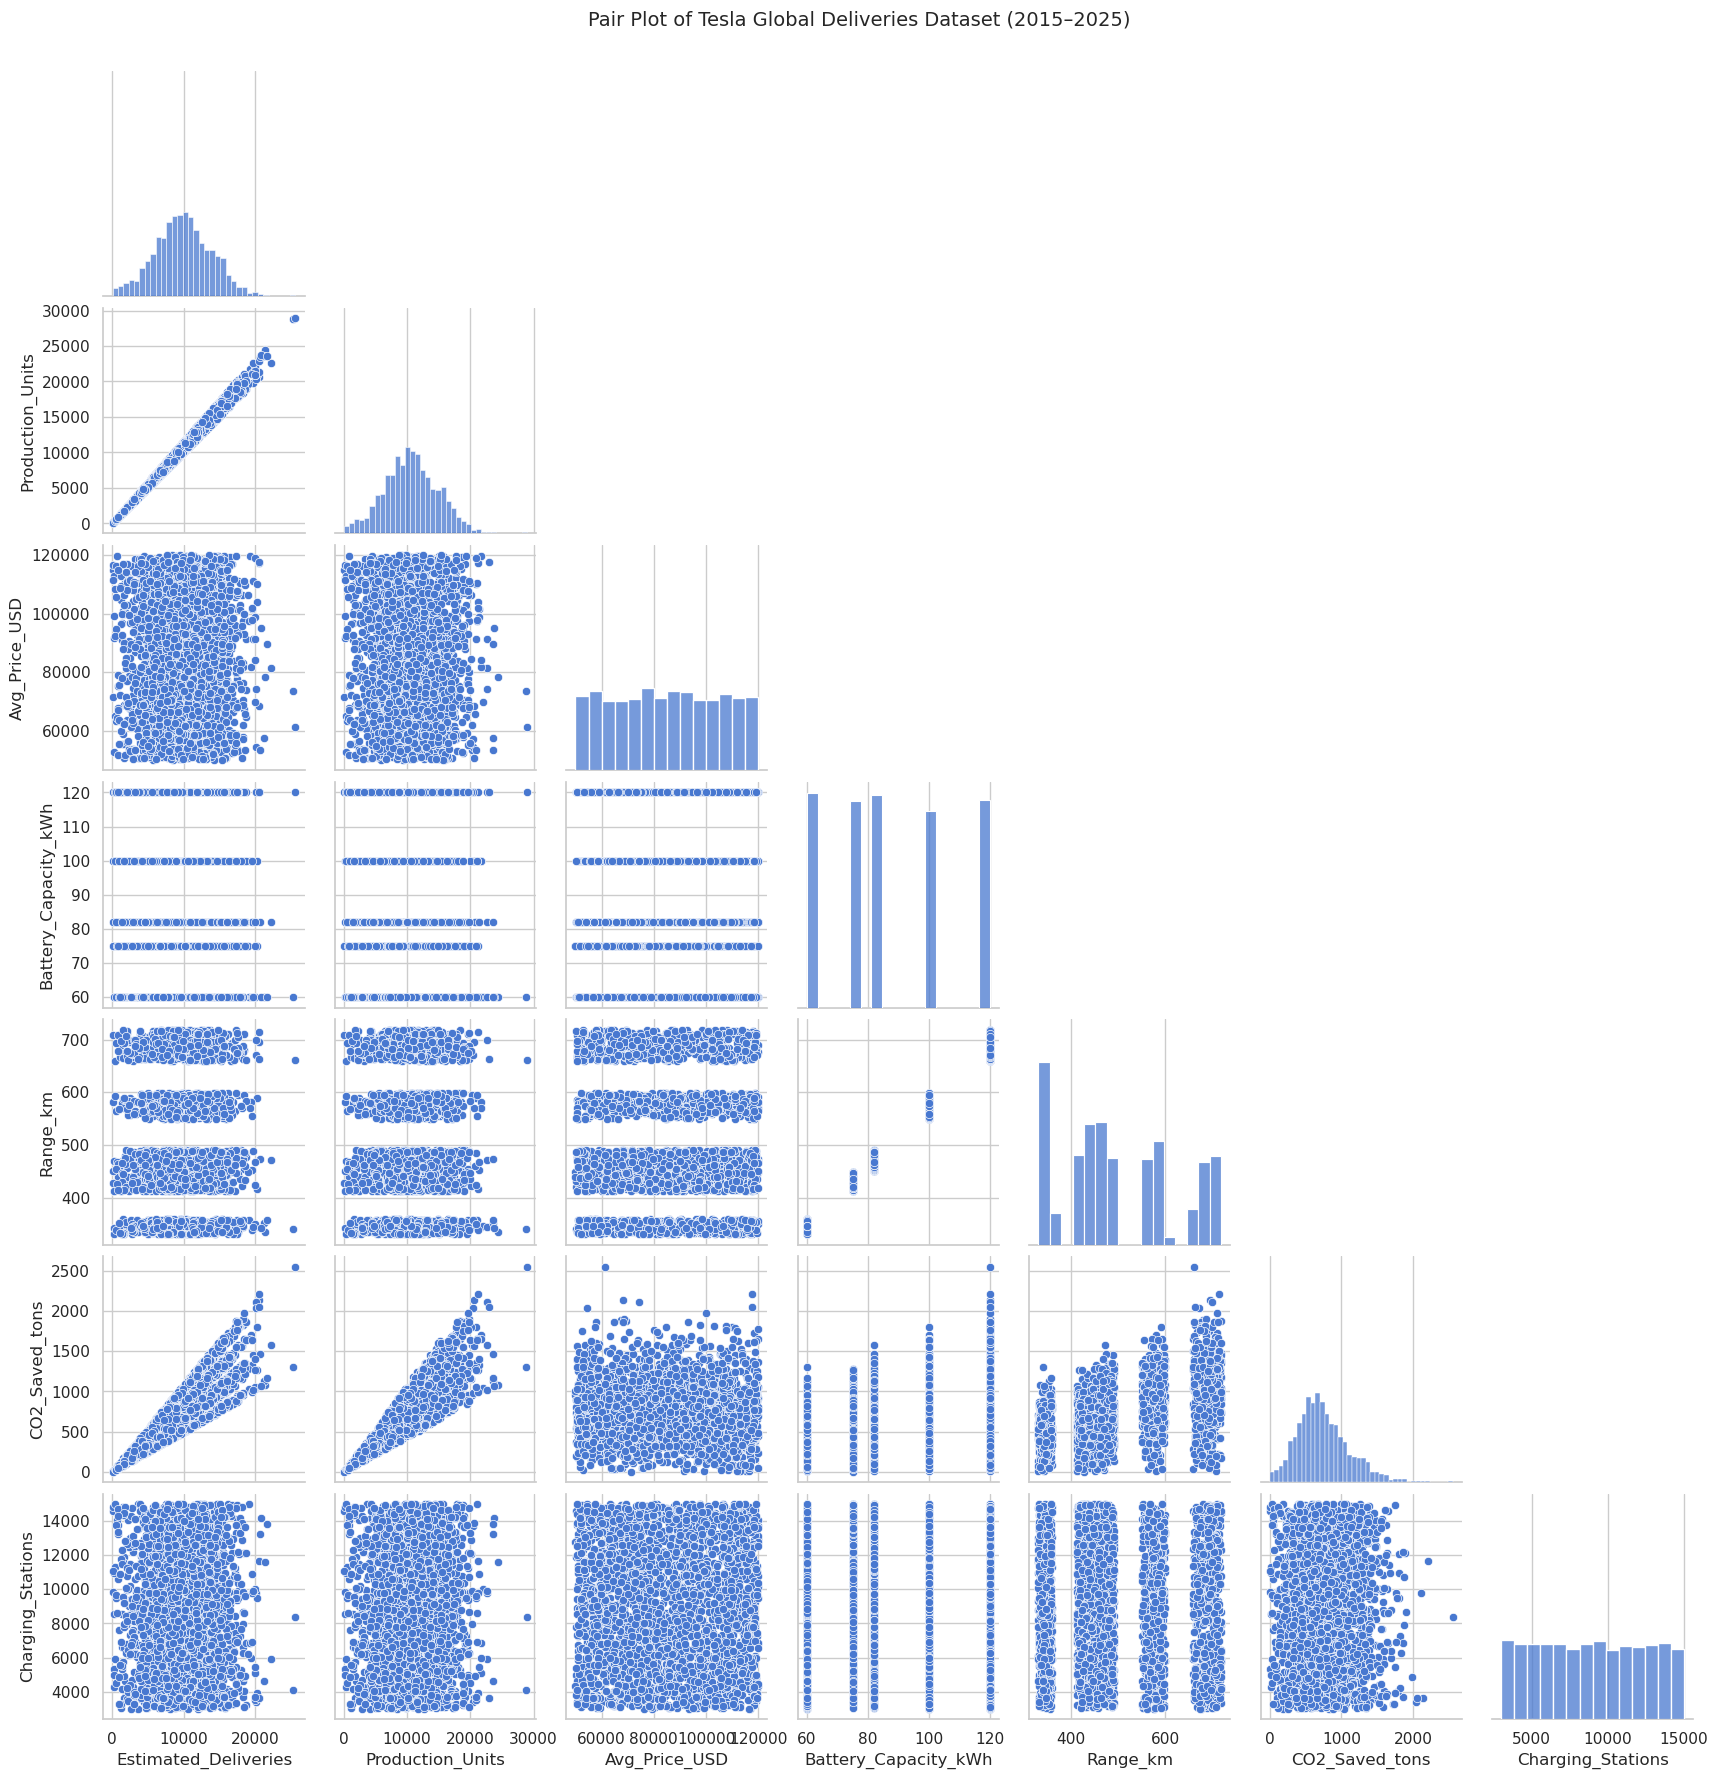

In [21]:
# Create the pair plot
g = sns.pairplot(df, 
                 vars=["Estimated_Deliveries", "Production_Units", "Avg_Price_USD", 
                       "Battery_Capacity_kWh", "Range_km", "CO2_Saved_tons", "Charging_Stations"], 
                 diag_kind="hist", 
                 corner=True)

# Add a main title
g.fig.suptitle("Pair Plot of Tesla Global Deliveries Dataset (2015–2025)", 
               y=1.02, fontsize=14)

# Save the plot to the working directory
g.fig.savefig("pairplot_tesla_dataset.png", dpi=300, bbox_inches="tight")

# Show the plot
plt.show()

Pair Plot Overview

The pair plot visualizes relationships and distributions across Tesla’s key quantitative variables from 2015–2025.
Most variables show right-skewed distributions, reflecting Tesla’s rapid growth over time.

Strong positive relationships are visible between:

Production Units and Estimated Deliveries, indicating efficient scaling of manufacturing and logistics.

Battery Capacity (kWh) and Range (km), showing that technological innovation directly enhances performance.

Deliveries and CO₂ Saved (tons), confirming Tesla’s growing environmental impact as sales expand.

Future exploration will focus on CO₂ savings, average price trends, and charging infrastructure, as these variables reveal deeper insights into Tesla’s sustainability performance and market adoption dynamics.

6. Create a categorical plot: Estimated Deliveries by Region

In [22]:
# Aggregate total deliveries by region
region_deliveries = (
    df.groupby("Region", as_index=False)["Estimated_Deliveries"]
      .sum()
      .sort_values("Estimated_Deliveries", ascending=False)
)

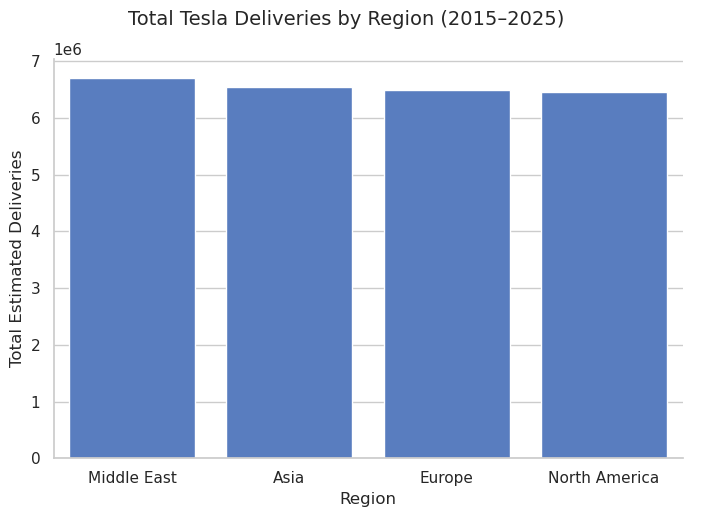

In [24]:
# Create categorical bar plot
g = sns.catplot(
    data=region_deliveries,
    x="Region",
    y="Estimated_Deliveries",
    kind="bar",
    height=5,
    aspect=1.4
)

g.set_axis_labels("Region", "Total Estimated Deliveries")
g.fig.suptitle(
    "Total Tesla Deliveries by Region (2015–2025)",
    y=1.03,
    fontsize=14
)

# Save figure
g.fig.savefig("catplot_deliveries_by_region.png", dpi=300, bbox_inches="tight")

plt.show()

Categorical Plot: Deliveries by Region (2015–2025)

This bar chart compares the total estimated Tesla deliveries across regions over the full 2015–2025 period.


Insights from the plot:

All four regions — Middle East, Asia, Europe, and North America — show comparable delivery volumes, each near 6–7 million units.

This suggests that Tesla has achieved a fairly balanced global distribution of deliveries rather than heavy concentration in a single market.

The small regional differences may indicate strong international demand, consistent production allocation, and global scalability of Tesla’s operations.

Why this is interesting:

It demonstrates Tesla’s evolution from a North America–centric company to a truly global manufacturer.

The Middle East’s comparable numbers may reflect rapid adoption in markets with growing infrastructure and investment in EVs.

Further exploration should compare regional deliveries with charging infrastructure (Charging_Stations) and CO₂ savings (CO2_Saved_tons) to assess whether sustainability impact scales equally across markets.

7. Hypotheses for further analysis

Based on the exploratory visual analysis of the Tesla Global Deliveries dataset, several hypotheses emerge that can be tested in later stages of the project:

1. Production–Deliveries Efficiency

H₁: There is a strong positive linear relationship between Tesla’s production units and estimated deliveries, indicating that higher production consistently translates into higher deliveries.
Rationale: The scatterplot and correlation heatmap show near-perfect alignment (r ≈ 0.99), suggesting high operational efficiency with minimal production backlog.

2. Battery Innovation and Vehicle Range

H₂: Increases in battery capacity (kWh) are associated with longer vehicle range (km).
Rationale: The scatterplot reveals a strong positive correlation (r ≈ 0.99), consistent with technological improvements directly enhancing performance metrics.

3. Deliveries and Sustainability Impact

H₃: Higher vehicle deliveries are positively correlated with CO₂ savings (tons).
Rationale: As Tesla sells more vehicles, total CO₂ savings rise proportionally, supporting the link between sales growth and environmental benefits.

4. Regional Market Differences

H₄: There are significant differences in total deliveries across regions.
Rationale: The categorical plot shows small but visible variations among regions, which may reflect differences in infrastructure, policy incentives, and EV market maturity.

5. Price–Performance Relationship

H₅: Models with higher average prices tend to have greater range and battery capacity.
Rationale: Tesla’s premium models (e.g., Model S, Model X) typically include larger battery packs and longer range, suggesting a positive relationship between technological performance and cost.